# Анализ данных  сервиса аренды самокатов GoFast 

**Описание проекта**
* Данные популярного сервиса аренды самокатов GoFast — данные о некоторых пользователях из нескольких городов, а также об их поездках.
* Чтобы совершать поездки по городу, пользователи сервиса пользуются мобильным приложением: 
 *без подписки:*
 *абонентская плата отсутствует;*
 *стоимость одной минуты поездки — 8 рублей;*
 *стоимость старта (начала поездки) — 50 рублей;*
 *с подпиской Ultra*
 *абонентская плата — 199 рублей в месяц;*
 *стоимость одной минуты поездки — 6 рублей;*
 *стоимость старта — бесплатно.*
* Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции.

**Цель проекта**
* Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

**Гипотезы**
* Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.
*  Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
* Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

**Описание данных**
* Пользователи (*users_go.csv*):
* *user_id* — уникальный идентификатор пользователя
* *name* — имя пользователя
* *age* — возраст
* *city* — город
* *subscription_type* — тип подписки (free, ultra)
* Поездки(*rides_go.csv*):
* *user_id* — уникальный идентификатор пользователя
* *distance* — расстояние, которое пользователь проехал в текущей сессии (в метрах)
* *duration* — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
* *date* — дата совершения поездки
* Подписки (*subscriptions_go.csv*):
* *subscription_type* — тип подписки
* *minute_price* — стоимость одной минуты поездки по данной подписке
* *start_ride_price* — стоимость начала поездки
* *subscription_fee* — стоимость ежемесячного платежа

**Ход исследования**
1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение данных
5. Подсчет выручки
6. Проверка гипотез

</div>

#### Шаг 1. Загрузка данных

In [1]:
import pandas as pd

In [3]:
users_go = pd.read_csv('C:/Users/ноутбук/Downloads/users_go.csv')
rides_go = pd.read_csv('C:/Users/ноутбук/Downloads/rides_go.csv')
subscriptions_go = pd.read_csv('C:/Users/ноутбук/Downloads/subscriptions_go.csv')

***1.2 Отобразим первые строки таблиц***

In [4]:
print('Пользователи: \n', users_go.head(10))
print('Поездки: \n', rides_go.head(10))
print('Подписки: \n', subscriptions_go.head(10))

Пользователи: 
    user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra
5        6      Регина   25       Краснодар             ultra
6        7       Игорь   23            Омск             ultra
7        8        Юрий   23       Краснодар             ultra
8        9          Ян   21       Пятигорск             ultra
9       10     Валерий   18    Екатеринбург             ultra
Поездки: 
    user_id     distance   duration        date
0        1  4409.919140  25.599769  2021-01-01
1        1  2617.592153  15.816871  2021-01-18
2        1   754.159807   6.232113  2021-04-20
3        1  2694.783254  18.511000  2021-08-11
4        1  4028.687306  26.265803  2021-08-28
5        

***1.3 Изучим общую информацию о каждой таблице***

In [5]:
users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [6]:
import matplotlib.pyplot as plt

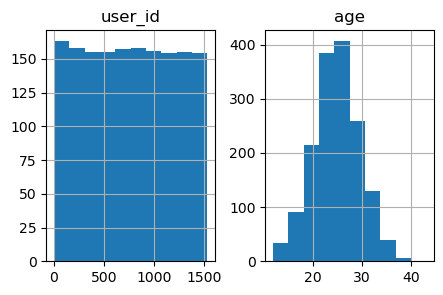

In [7]:
users_go.hist(figsize=(5, 3))
plt.show()

In [8]:
users_go.duplicated().sum()

31

***В таблице с данными о пользователях 5 столбцов и 1565 строк. Пропуски отсутсвуют. Тип данных в столбцах корректный. Явных дубликатов 31.***

In [9]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


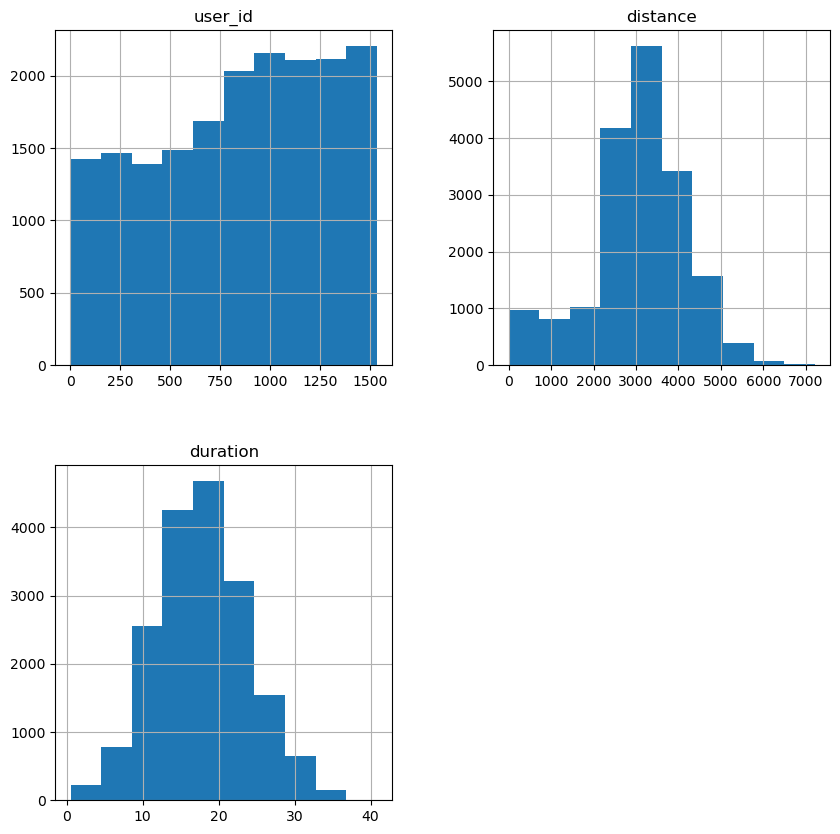

In [10]:
rides_go.hist(figsize=(10, 10))
plt.show()

In [11]:
rides_go.duplicated().sum()

0

***В таблице с данными о поездках 4 столбца и 18068 строк. Тип данных в стобце date некорректный (object). Пропуски и явные дубликаты отсутствуют.***

In [12]:
subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


In [13]:
subscriptions_go

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


***В таблице с данными о подписках 4 столбца и всего две строки без пропусков.***

**Вывод: В данных встречаются явные дубликаты и некорректный тип данных. Пропусков нет. Названия столбцов соответсвуют общему стилю.**

#### Шаг 2. Предобработка данных

***2.1 Удалим явные дубликаты в таблице с данными о пользователях. Их 31.***

In [14]:
users_go = users_go.drop_duplicates().reset_index(drop=True)

In [15]:
users_go.duplicated().sum()

0

***2.2 В таблице с данными о поездках в столбцах distance и duration приведем тип данных к целым числам.***

In [16]:
import numpy as np

In [17]:
rides_go['distance'] = rides_go['distance'].round(2).astype(int)

In [18]:
rides_go['duration'] = rides_go['duration'].astype(int)
rides_go.dtypes

user_id      int64
distance     int32
duration     int32
date        object
dtype: object

In [19]:
rides_go.head()

,user_id,distance,duration,date
0,1,4409,25,2021-01-01
1,1,2617,15,2021-01-18
2,1,754,6,2021-04-20
3,1,2694,18,2021-08-11
4,1,4028,26,2021-08-28


***2.3 В таблице с данными о поездках в столбце date некорректный тип данных(object). Следует отформатировать данные с датой и временем в понятный для Python тип данных.***

In [21]:
rides_go['date'] = pd.to_datetime(rides_go['date'])
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  int32         
 2   duration  18068 non-null  int32         
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(2), int64(1)
memory usage: 423.6 KB


***2.4 В таблице с данными о поездках добавим новый столбец с номером месяца на основе столбца date.***

In [22]:
rides_go['month'] = rides_go['date'].dt.month

In [23]:
rides_go.head()

,user_id,distance,duration,date,month
0,1,4409,25,2021-01-01,1
1,1,2617,15,2021-01-18,1
2,1,754,6,2021-04-20,4
3,1,2694,18,2021-08-11,8
4,1,4028,26,2021-08-28,8


**Итак, устранили некорректный тип данных, избавились от дубликатов, а так же добавили новый с толбец, который будет полезен для исследования. Можно приступить к анализу.**

#### Шаг 3. Исследовательский анализ данных

***3.1 Исследуем частоту встречаемости городов.***

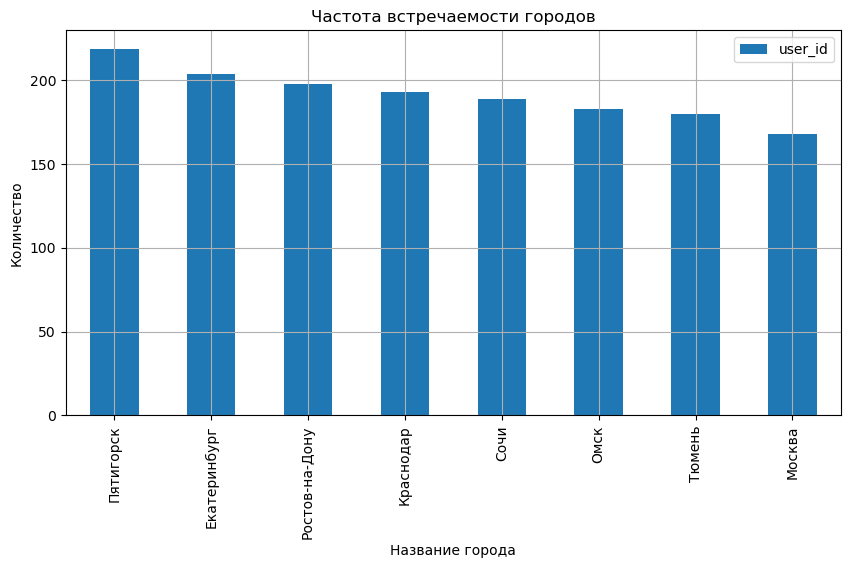

In [24]:
users_go.pivot_table(index='city', values='user_id', aggfunc='count').sort_values('user_id', ascending=False).plot(kind='bar', grid=True, figsize=(10, 5))
plt.title('Частота встречаемости городов')
plt.xlabel('Название города')
plt.ylabel('Количество')
plt.show()

In [25]:
users_go['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

***Самое большое количество пользователей в Пятигорске - 219 (219), Екатеринбурге (204) и Краснодаре (198). Меньше всего пользователей в Москве (168).***

***3.2 Исследуем соотношение пользователей с подпиской и без подписки.***

In [26]:
users_go.pivot_table(index='subscription_type', values='user_id', aggfunc='count').reset_index()

,subscription_type,user_id
0,free,835
1,ultra,699


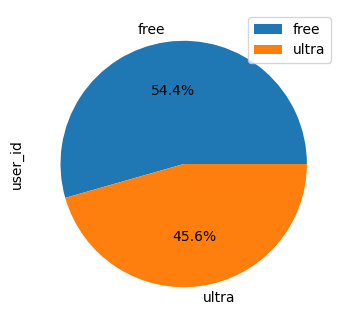

In [27]:
users_go.pivot_table(index='subscription_type', values='user_id', aggfunc='count').plot(kind='pie', y='user_id', figsize=(4,4), autopct='%1.1f%%')
plt.show()

***Пользователей с подпиской free больше, чем пользователей с подпиской ultra.***

***3.3 Исследуем возраст пользователей.***

In [28]:
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

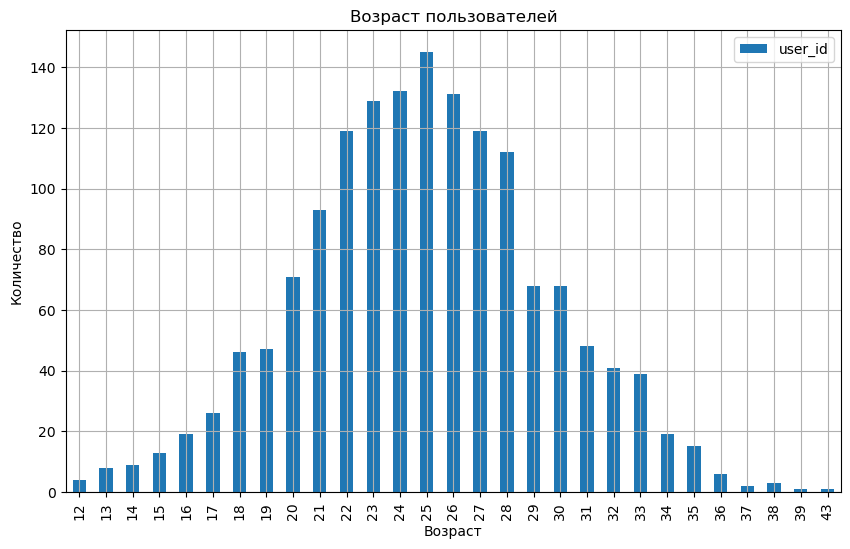

In [29]:
users_go.pivot_table(index='age', values='user_id', aggfunc='count').plot(kind='bar', grid=True, figsize=(10, 6))
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

***Распределение пользователей по возрасту нормальное. Услугами пользуются клиенты от 12 до 43 лет. Самое большое количество пользователей в возрасте от 22 до 28 лет.***

***3.4 Исследуем расстояние, которое пользователь преодолел за одну поездку.***

In [30]:
rides_go['distance'].describe()

count    18068.000000
mean      3070.164545
std       1116.831597
min          0.000000
25%       2542.750000
50%       3133.000000
75%       3776.000000
max       7211.000000
Name: distance, dtype: float64

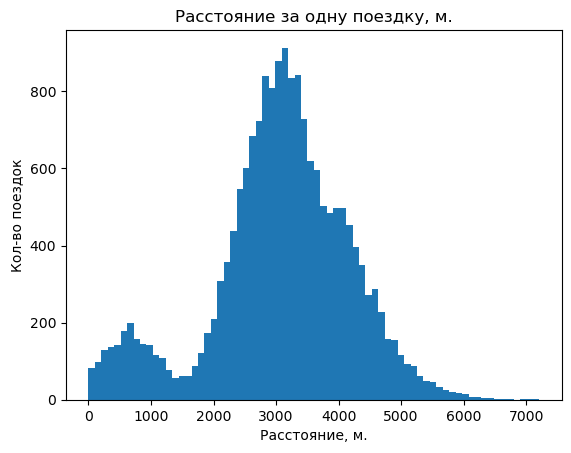

In [31]:
plt.hist(rides_go['distance'], bins=70)
plt.title('Расстояние за одну поездку, м.')
plt.xlabel('Расстояние, м.')
plt.ylabel('Кол-во поездок')
plt.show()

***Максимальное расстояние поездки составляет 7211м. Минимальное - 0 (здесь,скорее всего, пользователь отказался от поедки, либо - техническая ошибка). Чаще всего пользователи преодолевают расстояние чуть более 3000м. за одну поездку. На это указывает вершина графика распределения. В левом хвосте графика наблюдается пик около 700м.***

***3.5 Исследуем продолжительность поездок.***

In [32]:
rides_go['duration'].describe()

count    18068.000000
mean        17.303520
std          6.094928
min          0.000000
25%         13.000000
50%         17.000000
75%         21.000000
max         40.000000
Name: duration, dtype: float64

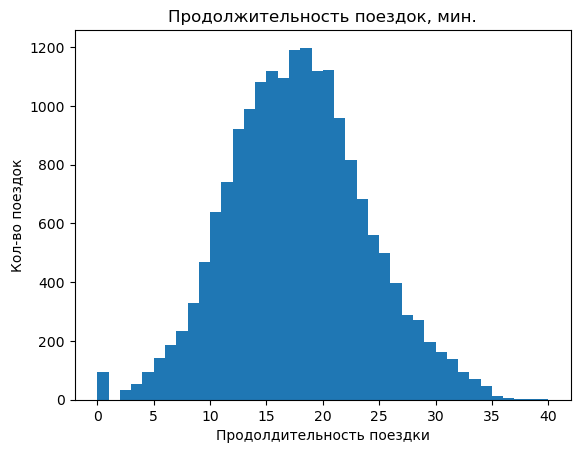

In [33]:
plt.hist(rides_go['duration'], bins=40)
plt.title('Продолжительность поездок, мин.')
plt.xlabel('Продолдительность поездки')
plt.ylabel('Кол-во поездок')
plt.show()

***В среднем продолжительность поедок составляет от 12 до 25 минут. Чаще всего пользователи тратят 18 миут на поездку. Самая длительная поезка около 40 минут. Поездок с минимальной продолжительностью 1 минута около 100. Возможно это и есть поездки от которых скорее всего отказался пользователь, а может быть техническая ошибка. Посмотрим срез данных по крайне коротким по времени поездкам.***

In [34]:
display(rides_go.query('duration <= 1'))

,user_id,distance,duration,date,month
6531,701,4196,0,2021-08-31,8
6570,704,4830,0,2021-10-14,10
6680,712,4684,0,2021-03-04,3
6695,713,5215,0,2021-02-25,2
6768,718,5197,0,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531,0,2021-01-19,1
17242,1477,6724,0,2021-01-12,1
17314,1483,4445,0,2021-03-06,3
17505,1496,5722,0,2021-02-14,2


***При значении продолжительности поездок 0,5 минут расстояние более 4000 м. Если бы пользователь отказался от поездки, то и расстояние должно было бы равняться нулю. За минуту на самокате такое расстояние не преодолеть. Нужно сообщить об этом коллегам. Возможен технический сбой***

**Итак, проведя иследовательский анализ некоторых данных можно сказать, что:**

**Самое большое количество пользователей в Пятигорске, Екатеринбурге и Краснодаре. Меньше всего пользователей в Москве.**

**Пользователей с подпиской free больше, чем пользователей с подпиской ultra.**

**Распределение пользователей по возрасту нормальное. Услугами пользуются клиенты от 12 до 43 лет. Самое большое количество пользователей в возрасте от 22 до 28 лет.**

**Максимальное расстояние поездки составляет 7211м. Минимальное - 0 (здесь,скорее всего, пользователь отказался от поедки, либо - техническая ошибка). Чаще всего пользователи преодолевают расстояние чуть более 3000м. за одну поездку. На это указывает вершина графика распределения. В левом хвосте графика наблюдается пик около 700м.**

***В среднем продолжительность поедок составляет от 12 до 25 минут. Чаще всего пользователи тратят 18 миут на поездку. Самая длительная поезка около 40 минут. Поездок с минимальной продолжительностью 1 минута около 100. При значении продолжительности поездок 0,5 минут расстояние более 4000 м. Если бы пользователь отказался от поездки, то и расстояние должно было бы равняться нулю. За минуту на самокате такое расстояние не преодолеть ***

#### Шаг 4. Объединение данных

***4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм.***

In [35]:
new_data_go = users_go.merge(rides_go, on='user_id')
new_data_go.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409,25,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617,15,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754,6,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694,18,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028,26,2021-08-28,8
5,1,Кира,22,Тюмень,ultra,2770,16,2021-10-09,10
6,1,Кира,22,Тюмень,ultra,3039,14,2021-10-19,10
7,1,Кира,22,Тюмень,ultra,2842,23,2021-11-06,11
8,1,Кира,22,Тюмень,ultra,3412,15,2021-11-14,11
9,1,Кира,22,Тюмень,ultra,748,15,2021-11-22,11


In [36]:
new_data_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  int32         
 6   duration           18068 non-null  int32         
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(2), object(3)
memory usage: 1.0+ MB


In [37]:
new_data_go.duplicated().sum()

0

In [38]:
new_data_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
dtype: int64

***В новом датафрейме 9 колонок и 18068 строк. Пропуски и явные дубликаты отсутствуют.***

***4.2 Создадим ещё два датафрейма.***

In [39]:
data_free = new_data_go[new_data_go['subscription_type'] == 'free']
display(data_free.head())
print(data_free.info())

,user_id,name,age,city,subscription_type,distance,duration,date,month
6500,700,Айдар,22,Омск,free,2515,14,2021-01-02,1
6501,700,Айдар,22,Омск,free,846,16,2021-02-01,2
6502,700,Айдар,22,Омск,free,4004,20,2021-02-04,2
6503,700,Айдар,22,Омск,free,1205,9,2021-02-10,2
6504,700,Айдар,22,Омск,free,3047,17,2021-02-14,2


<class 'pandas.core.frame.DataFrame'>
Index: 11568 entries, 6500 to 18067
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  int32         
 6   duration           11568 non-null  int32         
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(2), object(3)
memory usage: 768.2+ KB
None


In [40]:
data_ultra = new_data_go[new_data_go['subscription_type'] == 'ultra']
display(data_ultra.head())
print(data_ultra.info())

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409,25,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617,15,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754,6,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694,18,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028,26,2021-08-28,8


<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, 0 to 6499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   int32         
 6   duration           6500 non-null   int32         
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(2), object(3)
memory usage: 431.6+ KB
None


***Создали два датафрейма: data_free c данными о пользователях без подписки; data_ultra с данными о пользователях с подпиской. В обоих датафреймах по 9 столбцов. В data_free 11568 строк, в data_ultra - 6500 строк. То есть количество поездок без подписки намного больше, чем с подпиской Ultra.***

***4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.***

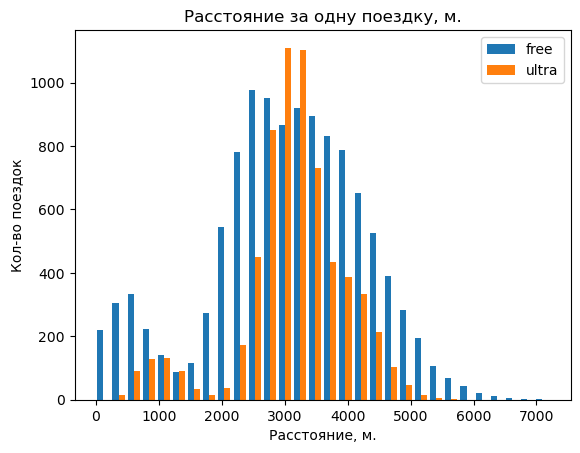

In [41]:
plt.hist([data_free['distance'], data_ultra['distance']], bins=30)
plt.legend(['free', 'ultra'])
plt.title('Расстояние за одну поездку, м.')
plt.xlabel('Расстояние, м.')
plt.ylabel('Кол-во поездок')
plt.show()

In [42]:
data_free['distance'].describe()

count    11568.000000
mean      3044.997752
std       1246.174057
min          0.000000
25%       2366.000000
50%       3114.000000
75%       3905.000000
max       7211.000000
Name: distance, dtype: float64

In [43]:
data_ultra['distance'].describe()

count    6500.000000
mean     3114.953692
std       836.895793
min       244.000000
25%      2785.000000
50%      3148.000000
75%      3560.000000
max      5699.000000
Name: distance, dtype: float64

***Расстояние, которое преодолевают пользователи без подписки, в основном составляет от 2300м. до 4000м., с подпиской Ultra - от 2700м. до 3500м. Максимальное расстояние, которое преодолевают пользователи без подписки, значительно меньше, чем у пользователей с подпиской Ultra.***

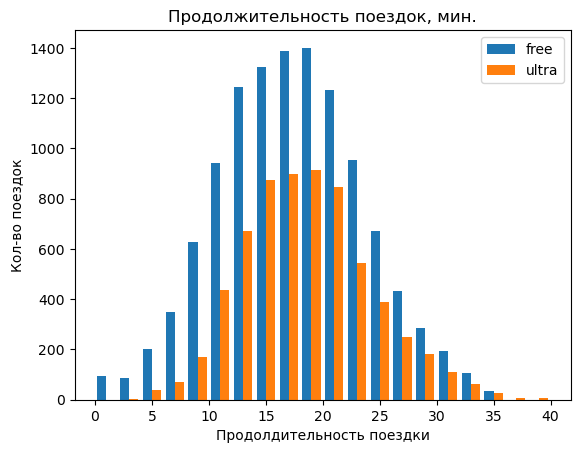

In [44]:
plt.hist([data_free['duration'], data_ultra['duration']], bins=20)
plt.legend(['free', 'ultra'])
plt.title('Продолжительность поездок, мин.')
plt.xlabel('Продолдительность поездки')
plt.ylabel('Кол-во поездок')
plt.show()

In [45]:
data_free['duration'].describe()

count    11568.000000
mean        16.890992
std          6.330250
min          0.000000
25%         12.000000
50%         17.000000
75%         21.000000
max         34.000000
Name: duration, dtype: float64

In [46]:
data_ultra['duration'].describe()

count    6500.000000
mean       18.037692
std         5.577439
min         3.000000
25%        14.000000
50%        18.000000
75%        21.000000
max        40.000000
Name: duration, dtype: float64

***Продолжительность проездок пользователей без подписки меньше, чем пользователей с подпиской Ultra. Чаще всего пользователи без подписки тратят на поезку от 13 до 22 минут, с подпиской Ultra от 13 до 25 минут.***

**Вывод:** 

**Расстояние, которое преодолевают пользователи без подписки, в основном составляет от 2000м. до 4300м., с подпиской Ultra - от 2500м. до 4000м. Максимальное расстояние, которое преодолевают пользователи без подписки, значительно меньше, чем у пользователей с подпиской Ultra.**

**Продолжительность проездок пользователей без подписки меньше, чем пользователей с подпиской Ultra. Чаще всего пользователи без подписки тратят на поезку от 13 до 22 минут, с подпиской Ultra от 13 до 25 минут.**

#### Шаг 5. Подсчёт выручки

***5.1 Добавим в таблицу new_data_go столбцы со стоимостью одной минуты поездки, стоимостью начала поездки и стоимостью ежемесячного платежа в зависимости от подписки.***

In [47]:
new_data_go['minute_price'] = np.where(new_data_go['subscription_type'] == 'free', 8, 6)
new_data_go['start_ride_price'] = np.where(new_data_go['subscription_type'] == 'free', 50, 0)
new_data_go['subscription_fee'] = np.where(new_data_go['subscription_type'] == 'free', 0, 199)
new_data_go

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409,25,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617,15,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754,6,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694,18,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028,26,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781,19,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840,21,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826,18,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902,16,2021-11-27,11,8,50,0


***5.2 Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.***

In [48]:
aggregated_date_go = new_data_go.pivot_table(index=('user_id', 'month','start_ride_price', 'subscription_fee', 'minute_price'), values=('distance', 'duration'), aggfunc=('sum','count')).reset_index()
aggregated_date_go.columns = ['user_id', 'month', 'start_ride_price', 'subscription_fee', 'minute_price', 'count', 'distance', 'count_1', 'duration']
aggregated_date_go.drop(['count_1'], axis=1, inplace=True)
aggregated_date_go

,user_id,month,start_ride_price,subscription_fee,minute_price,count,distance,duration
0,1,1,0,199,6,2,7026,40
1,1,4,0,199,6,1,754,6
2,1,8,0,199,6,2,6722,44
3,1,10,0,199,6,2,5809,30
4,1,11,0,199,6,3,7002,53
...,...,...,...,...,...,...,...,...
11326,1534,6,50,0,8,2,3409,24
11327,1534,8,50,0,8,2,7621,46
11328,1534,9,50,0,8,1,4928,22
11329,1534,11,50,0,8,4,13349,74


***5.3 Посчитаем помесячную выручку, которую принёс каждый пользователь***

In [49]:
aggregated_date_go['revenue'] = (
    (aggregated_date_go['start_ride_price'] * aggregated_date_go['count']) 
    + (aggregated_date_go['minute_price'] * aggregated_date_go['duration']) + aggregated_date_go['subscription_fee']
)
aggregated_date_go

,user_id,month,start_ride_price,subscription_fee,minute_price,count,distance,duration,revenue
0,1,1,0,199,6,2,7026,40,439
1,1,4,0,199,6,1,754,6,235
2,1,8,0,199,6,2,6722,44,463
3,1,10,0,199,6,2,5809,30,379
4,1,11,0,199,6,3,7002,53,517
...,...,...,...,...,...,...,...,...,...
11326,1534,6,50,0,8,2,3409,24,292
11327,1534,8,50,0,8,2,7621,46,468
11328,1534,9,50,0,8,1,4928,22,226
11329,1534,11,50,0,8,4,13349,74,792


In [50]:
aggregated_date_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   user_id           11331 non-null  int64
 1   month             11331 non-null  int32
 2   start_ride_price  11331 non-null  int32
 3   subscription_fee  11331 non-null  int32
 4   minute_price      11331 non-null  int32
 5   count             11331 non-null  int64
 6   distance          11331 non-null  int32
 7   duration          11331 non-null  int32
 8   revenue           11331 non-null  int64
dtypes: int32(6), int64(3)
memory usage: 531.3 KB


In [51]:
aggregated_date_go.isna().sum()

user_id             0
month               0
start_ride_price    0
subscription_fee    0
minute_price        0
count               0
distance            0
duration            0
revenue             0
dtype: int64

In [52]:
aggregated_date_go.duplicated().sum()

0

In [53]:
aggregated_date_go['revenue'].sum()

3747097

**В новом датафреме aggregated_date_go содержится 9 столбцов и 11331 срок без пропусков и явных дубликатов.**

**Годовая выручка составила 3813029 руб.**

#### Шаг 6. Проверка гипотез

***6.1 Проверим, тратят ли пользователи с подпиской больше времени на поездки?***

***Гипотезы:***

***Н0: Средняя длительность поездок без подписки и с подпиской ultra равна.***

***Н1: Средняя длительность поездок с подпиской ultra больше, чеми поездок без подписки.***

In [54]:
from scipy import stats as st
alpha = 0.05
results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


***Значение p-value показывает большую вероятность того, что средняя длительность поездок с подпиской ultra больше, чем поездок без подписки. Такая зависимость прослеживается и на гистограмах выше.***

***6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?*** 

***Гипотезы:***

***Н0: Среднее расстояние, которое преодолевают пользователи с подпиской ultra равно оптимальному расстоянию в 3130 метров.***

***Н1: Среднее расстояние, которое преодолевают пользователит с подпиской ultra больше оптимального расстояния в 3130 метров.***

In [55]:
optimal_distance = 3130
alpha = 0.05
results = st.ttest_1samp(data_ultra['distance'], optimal_distance, alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9263754830285825
Не получилось отвергнуть нулевую гипотезу


***Можно сделать вывод, что с большой вероятностью среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.***

***6.3 Проверим будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.***

***Гипотезы:***

***Н0: Помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки.***

***Н1: Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.***

In [56]:
alpha = 0.05
results = st.ttest_ind(
    aggregated_date_go.loc[aggregated_date_go['subscription_fee'] > 0, 'revenue'],
    aggregated_date_go.loc[aggregated_date_go['subscription_fee'] == 0, 'revenue'], alternative='greater'
)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1914705742669238e-43
Отвергаем нулевую гипотезу


***Вероятность что, помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки, очень высокая.***

***6.4 Ответим на вопрос: допустим, техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?***

***В данном случае выборки о количестве обращений зависимы и применяются к одному и тому же объекту (пользователи). Здесь можно применить метод scipy.stats.ttest_rel(), в параметре нужно указать alternative='less'.***

# Вывод по анализу данных  сервиса аренды самокатов GoFast: 
 
 
* **Самое большое количество пользователей в Пятигорске (219), Екатеринбурге (204) и Краснодаре (198). Меньше всего пользователей в Москве (168).**


* **Распределение пользователей по возрасту нормальное. Услугами пользуются клиенты от 12 до 43 лет. Самое большое количество пользователей в возрасте от 22 до 28 лет.**


* **Пользователей с подпиской Free больше (54,4%), чем пользователей с подпиской Ultra.**


* **Количество поездок без подписки намного больше, чем с подпиской Ultra**


* **Максимальное расстояние поездки составляет 7211м. Минимальное расстояние - 0 (здесь, либо пользователь отказался от поедки, либо - техническая ошибка).Чаще всего пользователи преодолевают расстояние чуть более 3000 м. за одну поездку. На это указывает вершина графика распределения. Но есть и вторая вершина графика около 700м.**


* **Расстояние, которое преодолевают пользователи без подписки, в основном составляет от 2300 м. до 4000 м., с подпиской Ultra - от 2700 м. до 3500 м. Максимальное расстояние, которое преодолевают пользователи без подписки, значительно меньше, чем у пользователей с подпиской Ultra.**


* **Проверка гипотезы о расстоянии поездок показала большую вероятность того, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. То есть с учетом износа самокатов для сервиса выгоднее, чтобы клиенты пользовались подпиской Ultra.**


* **В среднем продолжительность поездок составляет от 12 до 25 минут. Чаще всего пользователи тратят 18 минут на поездку. Самая длительная поезка около 40 минут. Поездок с минимальной продолжительностью 1 минута около 100. При значении продолжительности поездок 0,5 минут расстояние более 4000 м. Если бы пользователь отказался от поездки, то и расстояние должно было бы равняться нулю. За минуту на самокате такое расстояние не преодолеть. Следует обратить на это особое внимание.**


* **Продолжительность проездок пользователей без подписки меньше, чем пользователей с подпиской Ultra. Чаще всего пользователи без подписки тратят на поезку от 13 до 22 минут, с подпиской Ultra от 13 до 25 минут.**


* **При проверке основной гипотезы о длительности поездок значение p-value показывает: большую вероятность того, что средняя длительность поездок с подпиской ultra больше, чем поездок без подписки.**


* **При проверки гипотезы о выручке Т-тест показал, что вероятность того, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки, очень высокая.**


* **Исходя из выше сказанного можно смело утверждать, что увеличение количества пользователей с подпиской Ultra может принести положительный результат и помочь бизнесу вырасти.**


* **Для более глубокого анализа рекомендовано выяснить, есть ли взаимосвязь между моделью самоката и продолжительностью поездки, зависит ли продолжительность поездки от модели самоката и т.д.? А так же для увеличения эффективности последующих шагов (проведение акций, введение новых подписок) рекомендуется изучить сезонную активность пользователей обеих подписок.**



</div>